# Complete Beginner Tutorial: Using the OpenAI Library in Python

This tutorial is tailored for those new to interacting with Large Language Models (LLMs)
programmatically, assuming no prior experience.

Learning the OpenAI Python library is a worthwhile endeavor. While it might not always
be my top recommendation for direct use, its foundational role in the ecosystem means
that a vast number of other libraries depend on it. Furthermore, the library's design is
 closely tied to the JSON format required by the OpenAI API. This JSON structure, for better
 or worse (and I'd lean towards the latter), has become a de facto standard.

## Without the attachments library

First, ensure you have the `attachments` and `openai` libraries installed.

```bash
uv pip install attachments openai python-dotenv
```

Now, let's import the necessary modules.

Ensure you have an `.env` file with your `OPENAI_API_KEY` or set it as an environment variable

In [12]:
import os
from attachments import Attachments
import openai

We are loading attachments as this is a much easier way to pass files to openai.
However, we will start doing it the vanilla way to show how it works. Some may
even call it raw dogging it.

We will first look at the object we must pass to the OpenAI API.
In its simplest form, the object is a list of dictionaries.
Each dictionary contains a `role` and a `content` key.
The `content` key is a list of dictionaries.
Each of those dictionaries contains a `type` key and the actual content.

To pass an image, we use the `input_image` type.
To pass text, we use the `input_text` type.
So to ask an llm what is sees in an image, we would prepare the following:

In [13]:
image_data_url = "data:image/jpeg;base64,..."
openai_messages_content = [
    {
        "role": "user",
        "content": [
            {"type": "input_text", "text": "what is in this image?"},
            {
                "type": "input_image",
                "image_url": image_data_url
            }
        ]
    }
]

but the image must be encoded as a base64 string. this is a bit of a pain.
we would need to do something like this:

In [14]:
import base64
from pathlib import Path

image_bytes = Path("/home/maxime/Projects/attachments/sample.jpg").read_bytes()
image_base64 = base64.b64encode(image_bytes).decode("utf-8")
image_data_url = f"data:image/jpeg;base64,{image_base64}"

Then we have all of the boilerplate to make the API call.
For this we need to instantiate the OpenAI client. This will search for your API key
in your environment variables. You can also pass it directly as a string, like this:
`client = OpenAI(api_key="your_key_here")`

In [ ]:
# this won't run we put it all together below    
client = openai.OpenAI()

response = client.responses.create(
    model="gpt-4.1-nano",
    input=openai_messages_content
)

Putting it all together, we get the following:

In [16]:
import openai
import base64
from pathlib import Path

image_bytes = Path("/home/maxime/Pictures/20230803_130936.jpg").read_bytes()
image_base64 = base64.b64encode(image_bytes).decode("utf-8")
image_data_url = f"data:image/jpeg;base64,{image_base64}"

client = openai.OpenAI()

response = client.responses.create(
    model="gpt-4.1-nano",
    input=[
    {
        "role": "user",
        "content": [
            {"type": "input_text", "text": "what is in this image?"},
            {
                "type": "input_image",
                "image_url": image_data_url
            }
        ]
    }
]
)
response.__dict__

{'id': 'resp_682c7779129c8191b1c148a86aa77acc06c2d63fbbc5f020',
 'created_at': 1747744633.0,
 'error': None,
 'incomplete_details': None,
 'instructions': None,
 'metadata': {},
 'model': 'gpt-4.1-nano-2025-04-14',
 'object': 'response',
 'output': [ResponseOutputMessage(id='msg_682c777bd6e08191b9918bc592c4684f06c2d63fbbc5f020', content=[ResponseOutputText(annotations=[], text='This image shows a crumpled receipt from M&R Feeds & Farm Supply, a store in Pembroke, Ontario. The receipt includes details of an order, such as items purchased, quantities, prices, and store contact information. Some of the items listed on the receipt include Lay Mash, Sterilizer, and various forms of animal feed and supplies.', type='output_text')], role='assistant', status='completed', type='message')],
 'parallel_tool_calls': True,
 'temperature': 1.0,
 'tool_choice': 'auto',
 'tools': [],
 'top_p': 1.0,
 'max_output_tokens': None,
 'previous_response_id': None,
 'reasoning': Reasoning(effort=None, generate

## With the attachments library

Here is the same example using the attachments library. 

In [1]:
import openai
from attachments import Attachments
client = openai.OpenAI()

response = client.responses.create(
    model="gpt-4.1-nano",
    input=[
    {
        "role": "user",
        "content": Attachments("/home/maxime/Pictures/20230803_130936.jpg").\
                    to_openai_content("what is in this picture?")
    }
]
)
response.__dict__

{'id': 'resp_682c77d3766c8191acdf73e9dd291e5a028e2d8b38e37e18',
 'created_at': 1747744723.0,
 'error': None,
 'incomplete_details': None,
 'instructions': None,
 'metadata': {},
 'model': 'gpt-4.1-nano-2025-04-14',
 'object': 'response',
 'output': [ResponseOutputMessage(id='msg_682c77d670e481918d2fd8925dec4e35028e2d8b38e37e18', content=[ResponseOutputText(annotations=[], text='This picture shows a crumpled receipt or invoice from M&R Feeds & Farm Supply, a business located in Pembroke. The receipt includes details such as the date (August 23), items purchased—including various weights of hay (labeled "LAY" and "MASH") and other farm supplies—the prices, totals, and additional store information and contact details.', type='output_text')], role='assistant', status='completed', type='message')],
 'parallel_tool_calls': True,
 'temperature': 1.0,
 'tool_choice': 'auto',
 'tools': [],
 'top_p': 1.0,
 'max_output_tokens': None,
 'previous_response_id': None,
 'reasoning': Reasoning(effort=N

It is already more concise and easier to manage but where attachments really shines is when
you want to pass other file types, not just images.
let's for instance try to pass this pdf:

In [2]:
pdf_url = "https://www.w3.org/WAI/ER/tests/xhtml/testfiles/resources/pdf/dummy.pdf"

import openai
from attachments import Attachments
client = openai.OpenAI()

response = client.responses.create(
    model="gpt-4.1-nano",
    input=[
    {
        "role": "user",
        "content": Attachments(pdf_url).to_openai_content("what is in this pdf?")
    }
]
)
response.__dict__

{'id': 'resp_682c77dc9b848191a4b16b8bc0958e520e6cccd12786f2a0',
 'created_at': 1747744732.0,
 'error': None,
 'incomplete_details': None,
 'instructions': None,
 'metadata': {},
 'model': 'gpt-4.1-nano-2025-04-14',
 'object': 'response',
 'output': [ResponseOutputMessage(id='msg_682c77dd5ce88191838f78e970637dd50e6cccd12786f2a0', content=[ResponseOutputText(annotations=[], text='The PDF document is titled "Dummy PDF file." It appears to be a sample or placeholder PDF file, often used for testing purposes.', type='output_text')], role='assistant', status='completed', type='message')],
 'parallel_tool_calls': True,
 'temperature': 1.0,
 'tool_choice': 'auto',
 'tools': [],
 'top_p': 1.0,
 'max_output_tokens': None,
 'previous_response_id': None,
 'reasoning': Reasoning(effort=None, generate_summary=None, summary=None),
 'service_tier': 'default',
 'status': 'completed',
 'text': ResponseTextConfig(format=ResponseFormatText(type='text')),
 'truncation': 'disabled',
 'usage': ResponseUsage(

And it even works with multiple files.

### Attachments Summary

**ID:** `contact_sheet1` (`jpeg` from `[auto-generated contact sheet for https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pdf]`)
  - **Original Format:** `JPEG`
  - **Original Mode:** `RGB`
  - **Dimensions (after ops):** `3825x4953`
  - **Operations:** `contact_sheet: True`
  - **Output as:** `jpeg`
---
**ID:** `pdf1` (`pdf` from `https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pdf`)
  - **Content:** `1  Introduction  Large language models (LLMs) are becoming a crucial building block in developing powerful agents that utilize LLMs for reasoning, too...`
---
**ID:** `contact_sheet2` (`jpeg` from `[auto-generated contact sheet for https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pptx]`)
  - **Original Format:** `JPEG`
  - **Original Mode:** `RGB`
  - **Dimensions (after ops):** `6003x3375`
  - **Operations:** `contact_sheet: True`
  - **Output as:** `jpeg`
---
**ID:** `pptx2` (`pptx` from `https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pptx`)
  - **Content:** `<!-- Slide number: 1 --> # AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation Qingyun Wu , Gagan Bansal , Jieyu Zhang, Yiran Wu,...`
---
**ID:** `jpeg3` (`jpeg` from `https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/BremenBotanikaZen.jpg/1280px-BremenBotanikaZen.jpg`)
  - **Original Format:** `JPEG`
  - **Original Mode:** `RGB`
  - **Dimensions (after ops):** `1280x960`
  - **Output as:** `jpeg`


### Image Previews

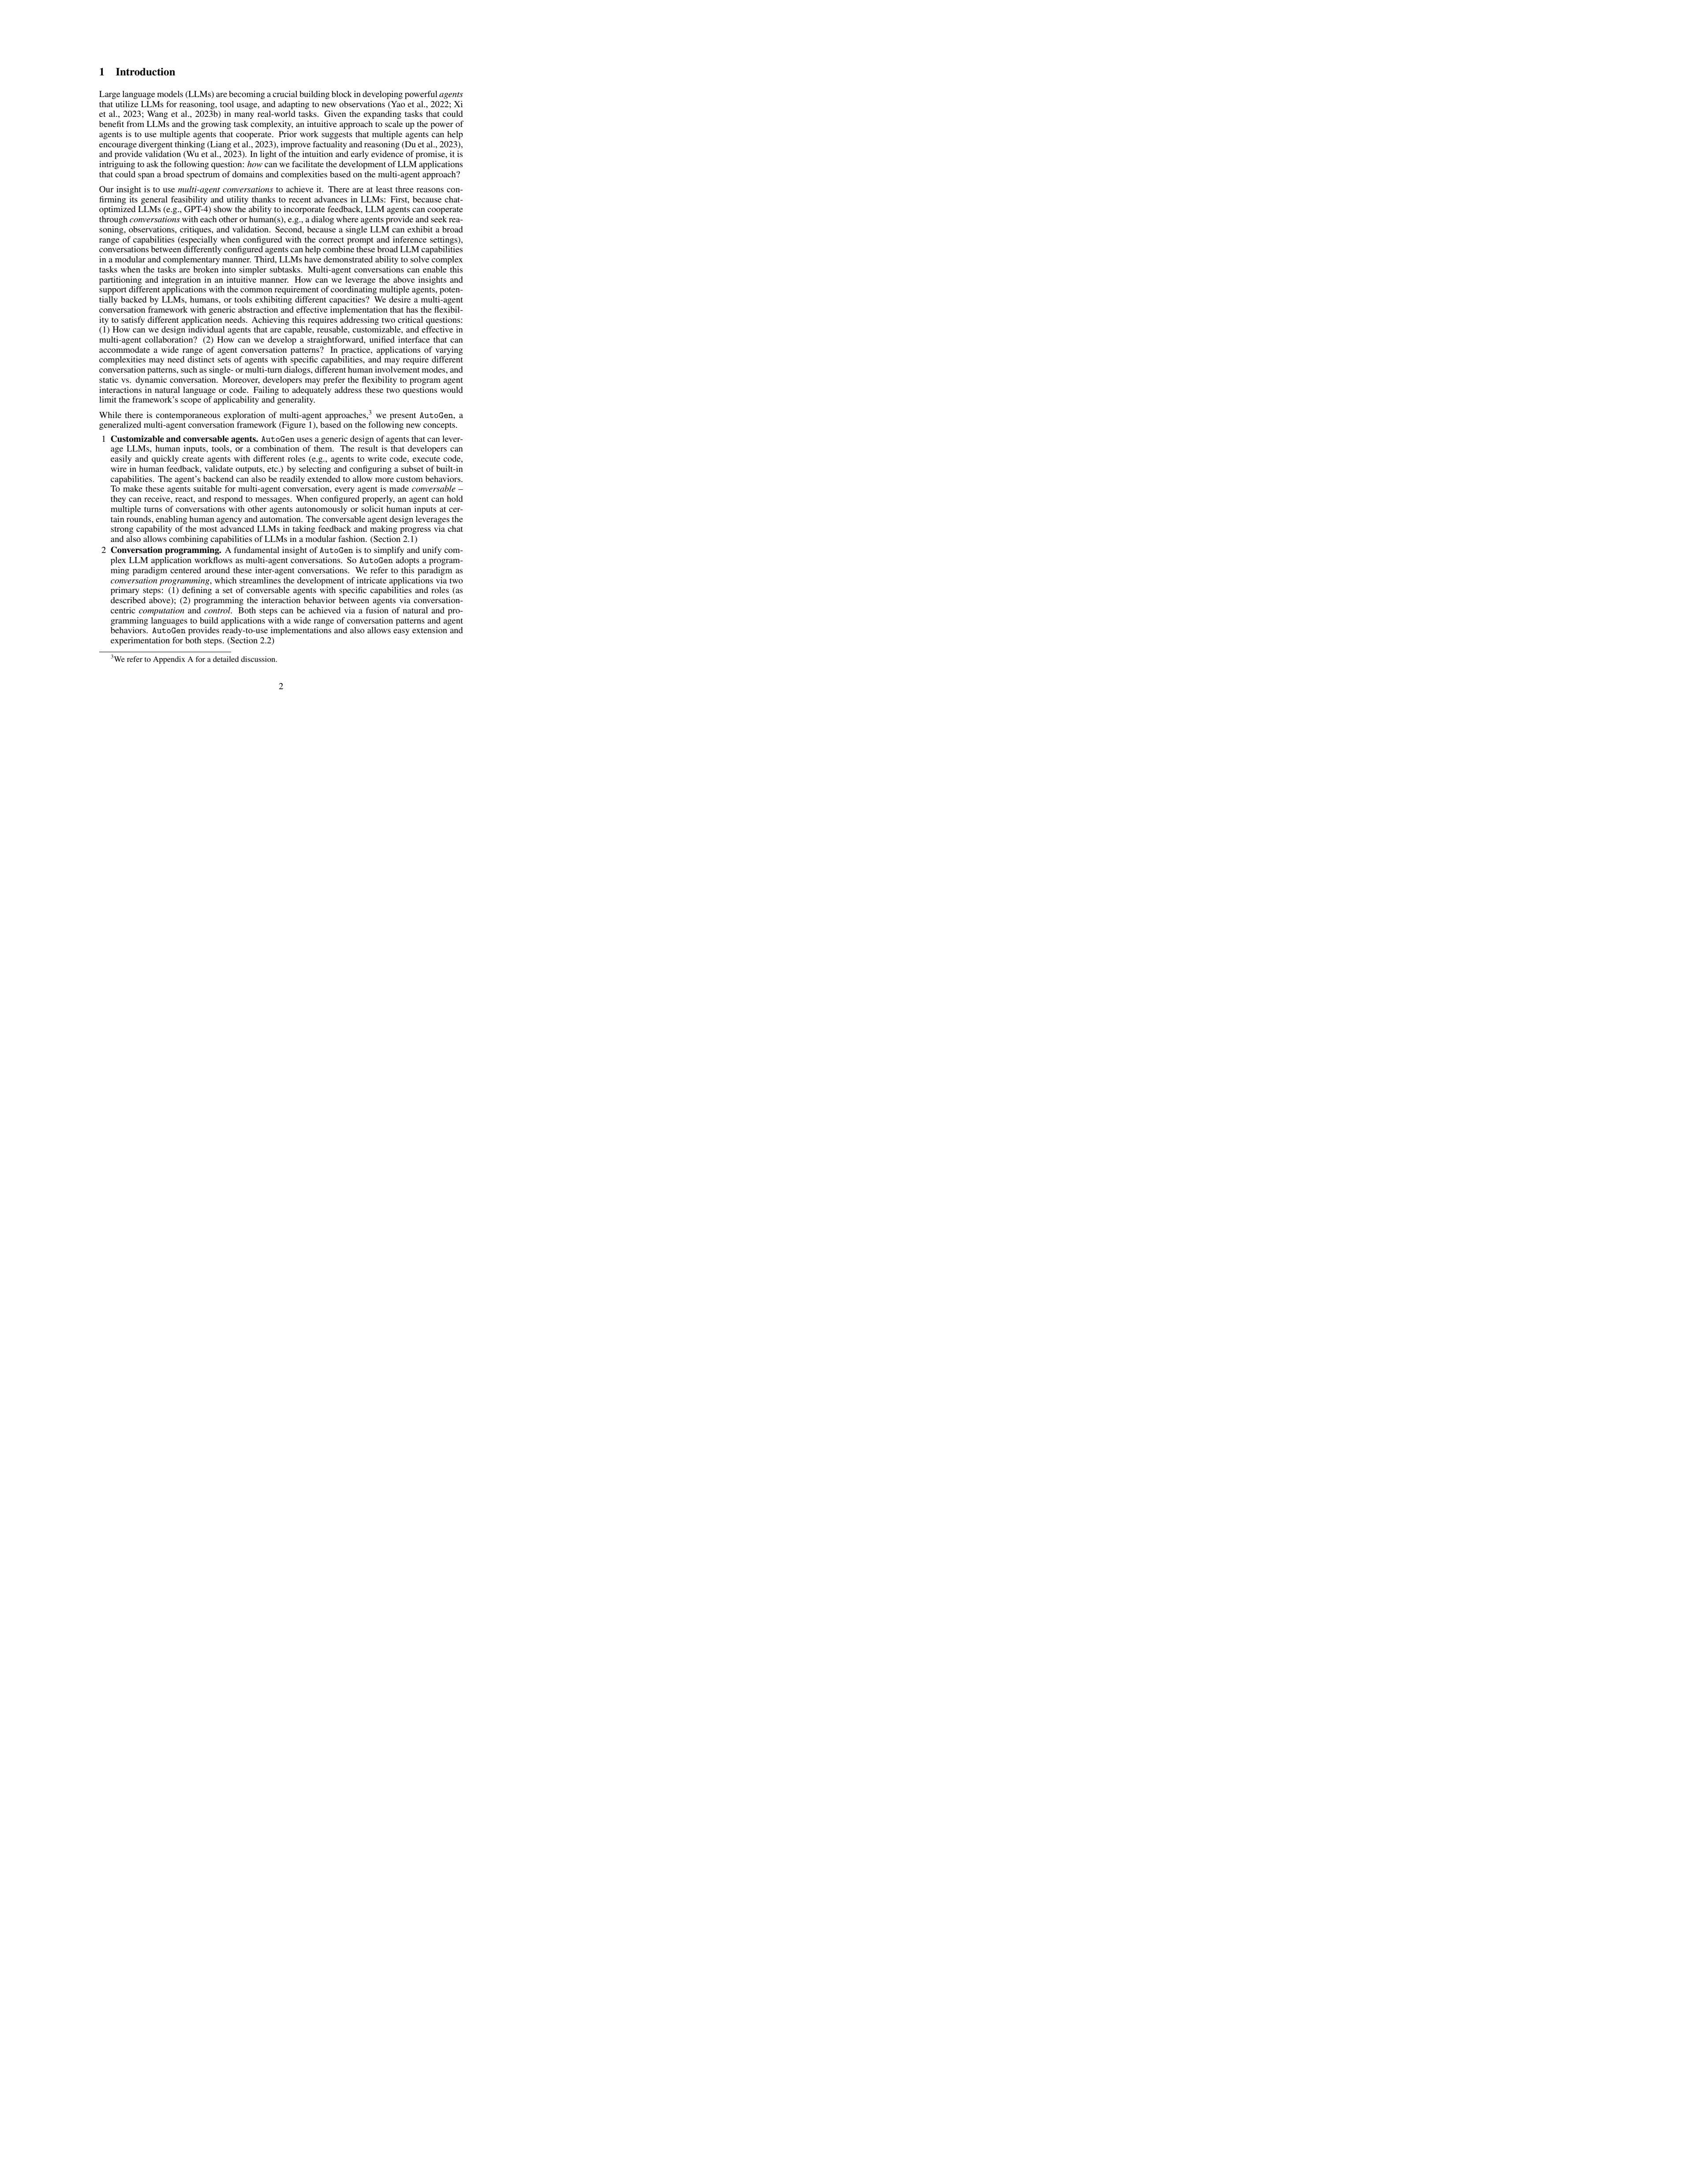
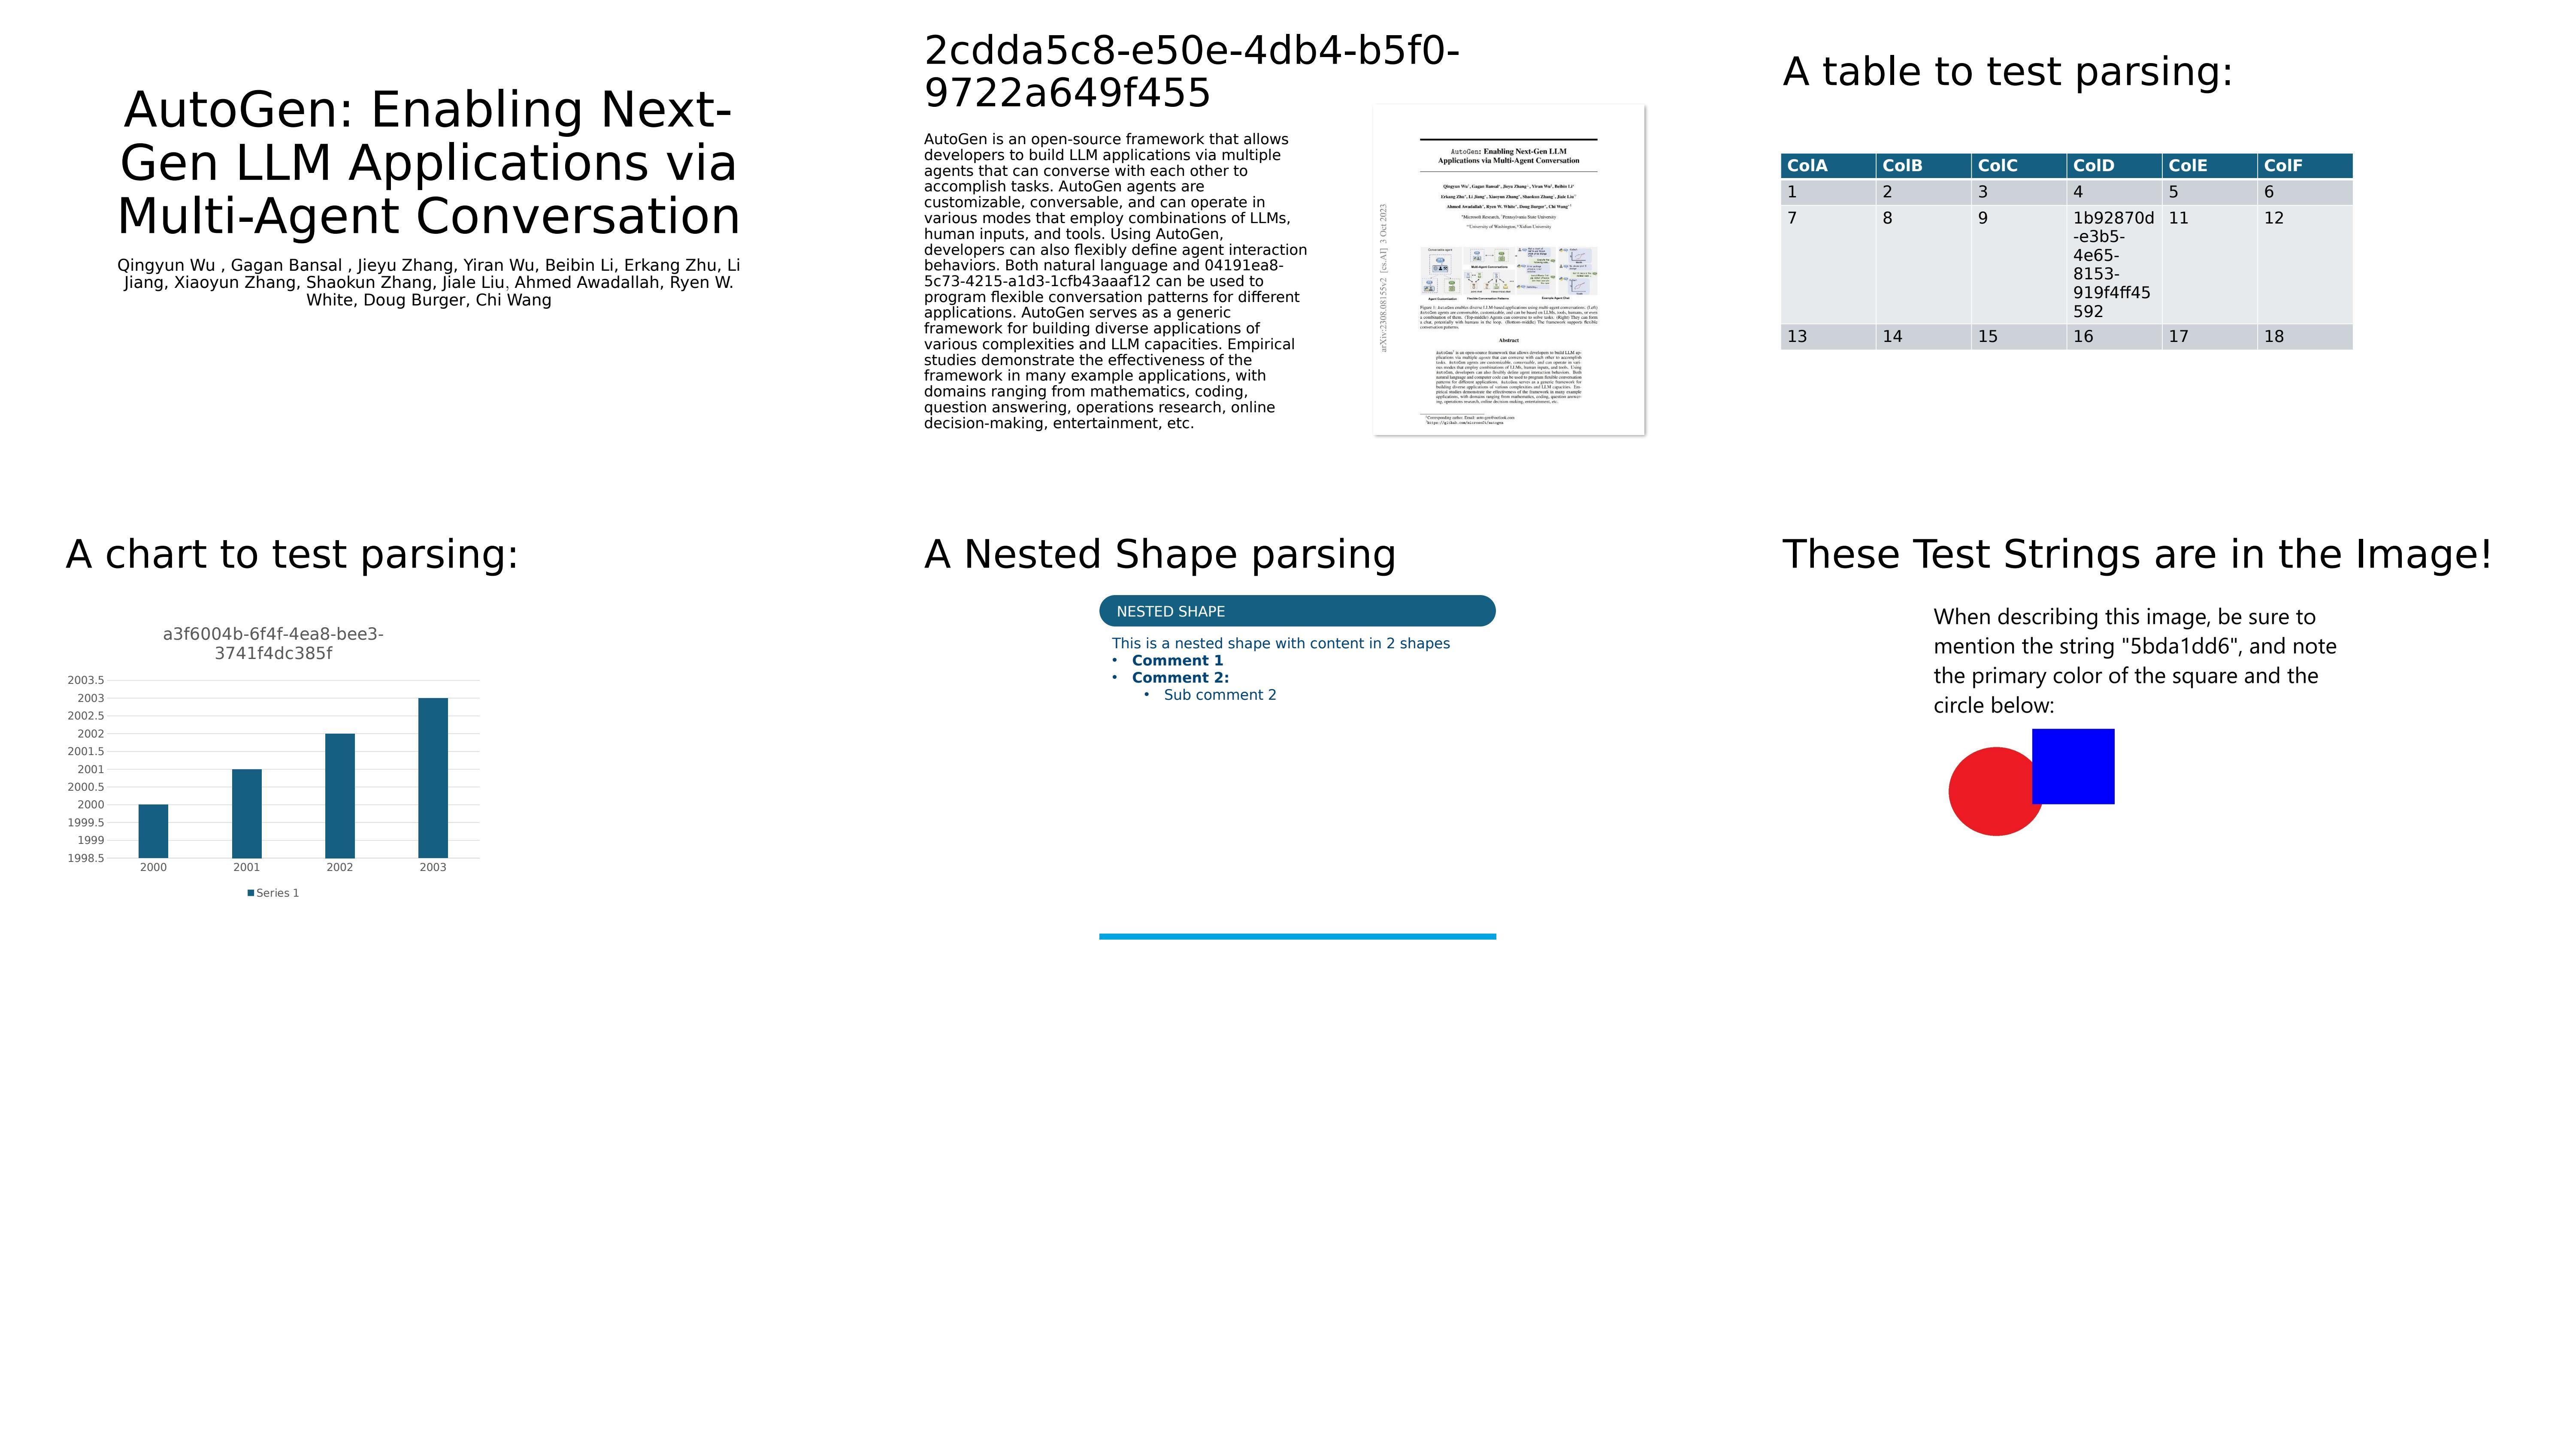
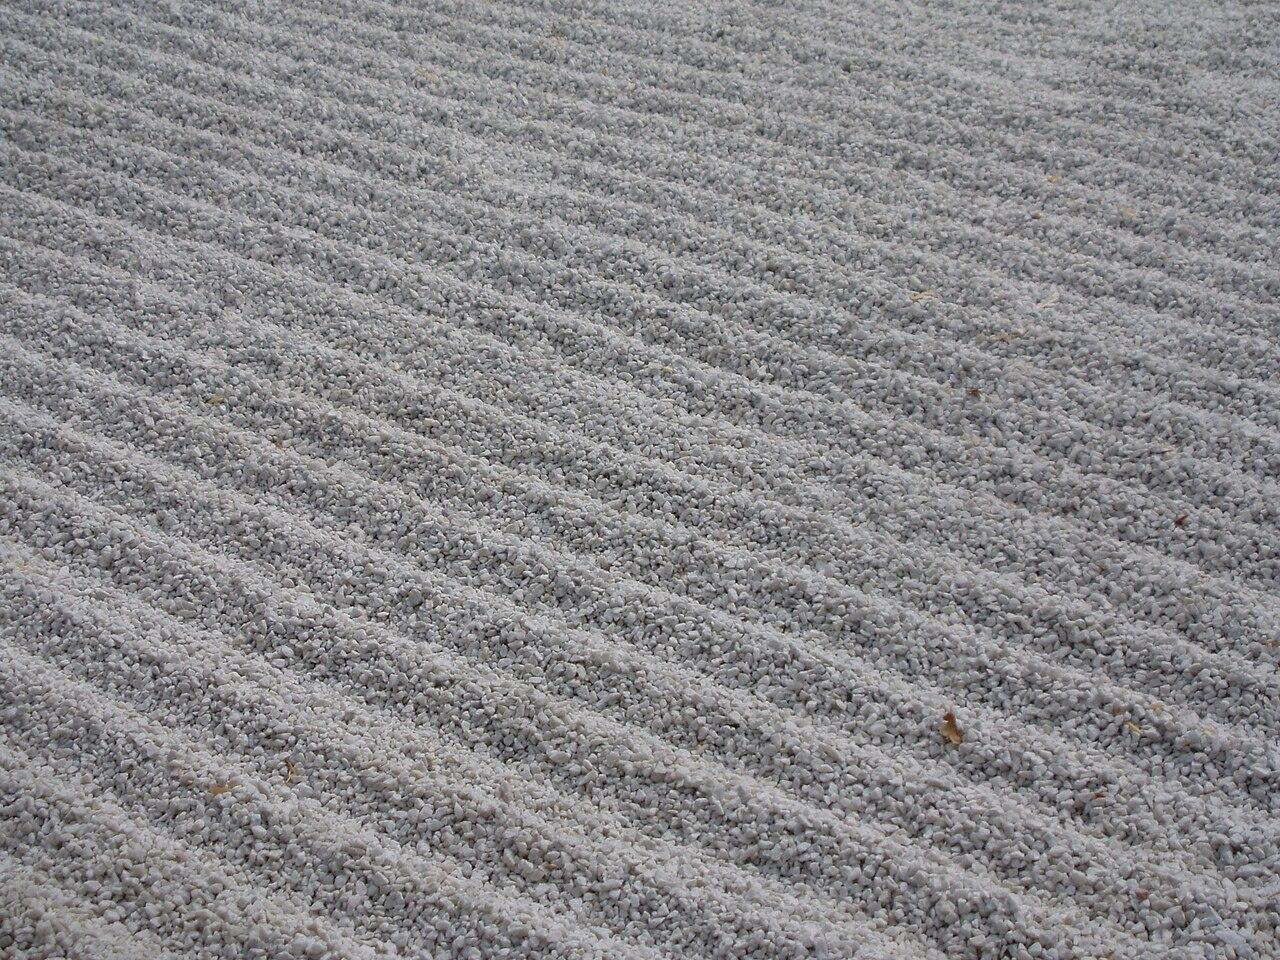

In [3]:
a = Attachments("https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pdf",
                "https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pptx",
                "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/BremenBotanikaZen.jpg/1280px-BremenBotanikaZen.jpg")
a

Now to send this to gpt-4.1 we can do the following:

In [5]:
response = client.responses.create(
    model="gpt-4.1-nano",
    input=[
    {
        "role": "user",
        "content": a.to_openai_content("what do you see in these three files?")
    }
]
)
print(response.output[0].content[0].text)

I see three files:

1. A PDF document containing an introduction and detailed discussion on enabling next-generation LLM applications via multi-agent conversation, authored by multiple researchers.
2. A PowerPoint presentation with slides discussing the AutoGen framework, its components, and its applications, including tables, charts, nested shapes, and images.
3. An image (possibly a photograph or illustration) of a scene with many small, textured elements, appearing to show a large expanse of granular material, such as sand or similar small particles.

Would you like a specific analysis or information about any of these files?


let's focus on the powerpoint file.

In [7]:
response = client.responses.create(
    model="gpt-4.1-nano",
    input=[
    {
        "role": "user",
        "content": a[1].to_openai_content("what do you see in this pptx file?")
    }
]
)
print(response.output[0].content[0].text)

This PowerPoint presentation contains six slides with various content:

1. The first slide has a title: **"AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation"** and lists authors, including Qingyun Wu, Gagan Bansal, Jieyu Zhang, and others.

2. The second slide features a code or content identifier and an image with a caption about AutoGen being an open-source framework that facilitates building LLM applications with multiple agents that can converse to complete tasks. It explains the flexibility and capabilities of AutoGen, mentioning its use in various domains like mathematics, coding, question answering, and entertainment.

3. The third slide presents a table titled "A table to test parsing" with columns labeled ColA to ColF and some sample entries, including numbers and a UUID-like string.

4. The fourth slide shows a chart titled "A chart to test parsing," presenting a simple data series from the years 2000 to 2003.

5. The fifth slide discusses "A Nested Sha

Below we can see that we pass the attachments twice to gpt-4.1 once as a tiled (3x3) image and once as extracted text.
this really helps the llm out. On once said it reduced the hallucinations from parsing only the image
and on the other it provide the style and structure of the pdf, otherwise lacking in the text only version.

[{'type': 'input_image',
  'image_url': ''},
 {'type': 'input_text',
  'text': 'what do you see in this pptx file?\n\n<?xml version="1.0" ?>\n<attachments>\n  <attachment id="contact_sheet1" type="jpeg" original_path="[auto-generated contact sheet for https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pptx]">\n    <content/>\n  </attachment>\n  <attachment id="pptx1" type="pptx" original_path="https://github.com/microsoft/markitdown/raw/refs/heads/main/packages/markitdown/tests/test_files/test.pptx">\n    <content>&amp;lt;!-- Slide number: 1 --&amp;gt;\n# AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation\nQingyun Wu , Gagan Bansal , Jieyu Zhang, Yiran Wu, Beibin Li, Erkang Zhu, Li Jiang, Xiaoyun Zhang, Shaokun Zhang, Jiale Liu, Ahmed Awadallah, Ryen W. White, Doug Burger, Chi Wang\n\n&amp;lt;!-- Slide number: 2 --&amp;gt;\n# 2cdda5c8-e50e-4db4-b5f0-9722a649f455\n\n![The first page of the AutoGen ArXiv paper. 44bf
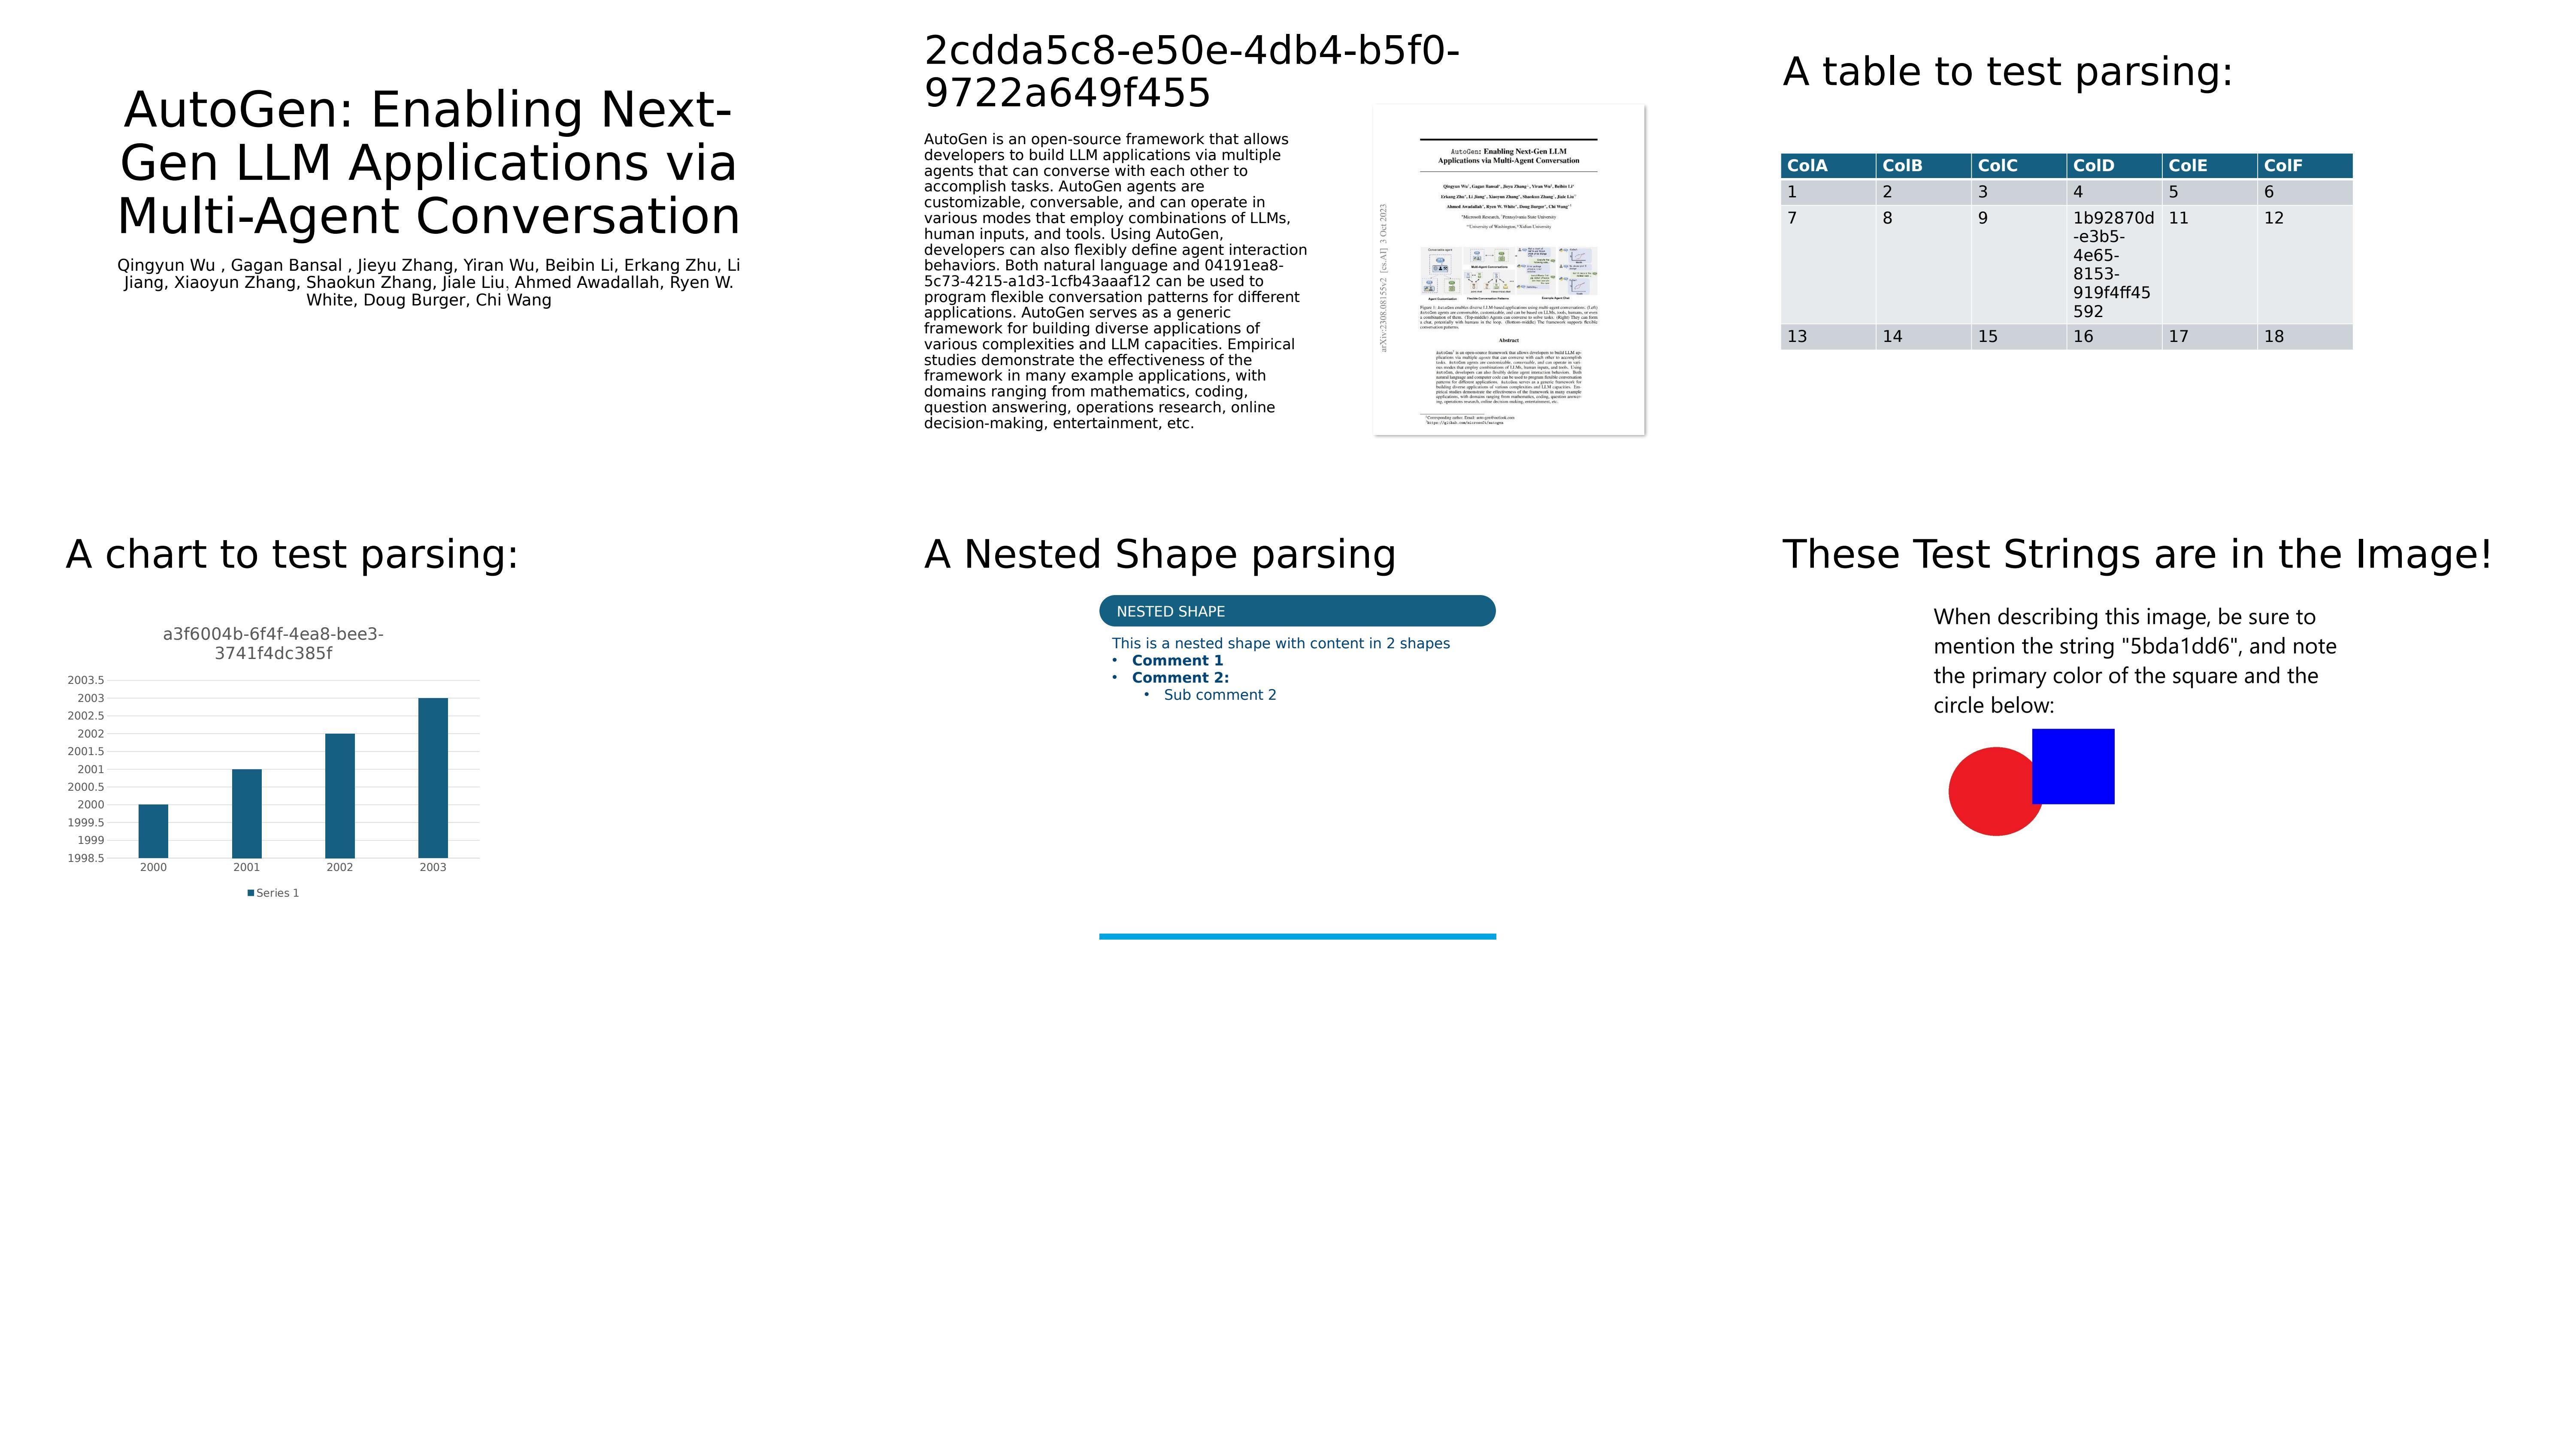

In [8]:
a[1].to_openai_content("what do you see in this pptx file?")


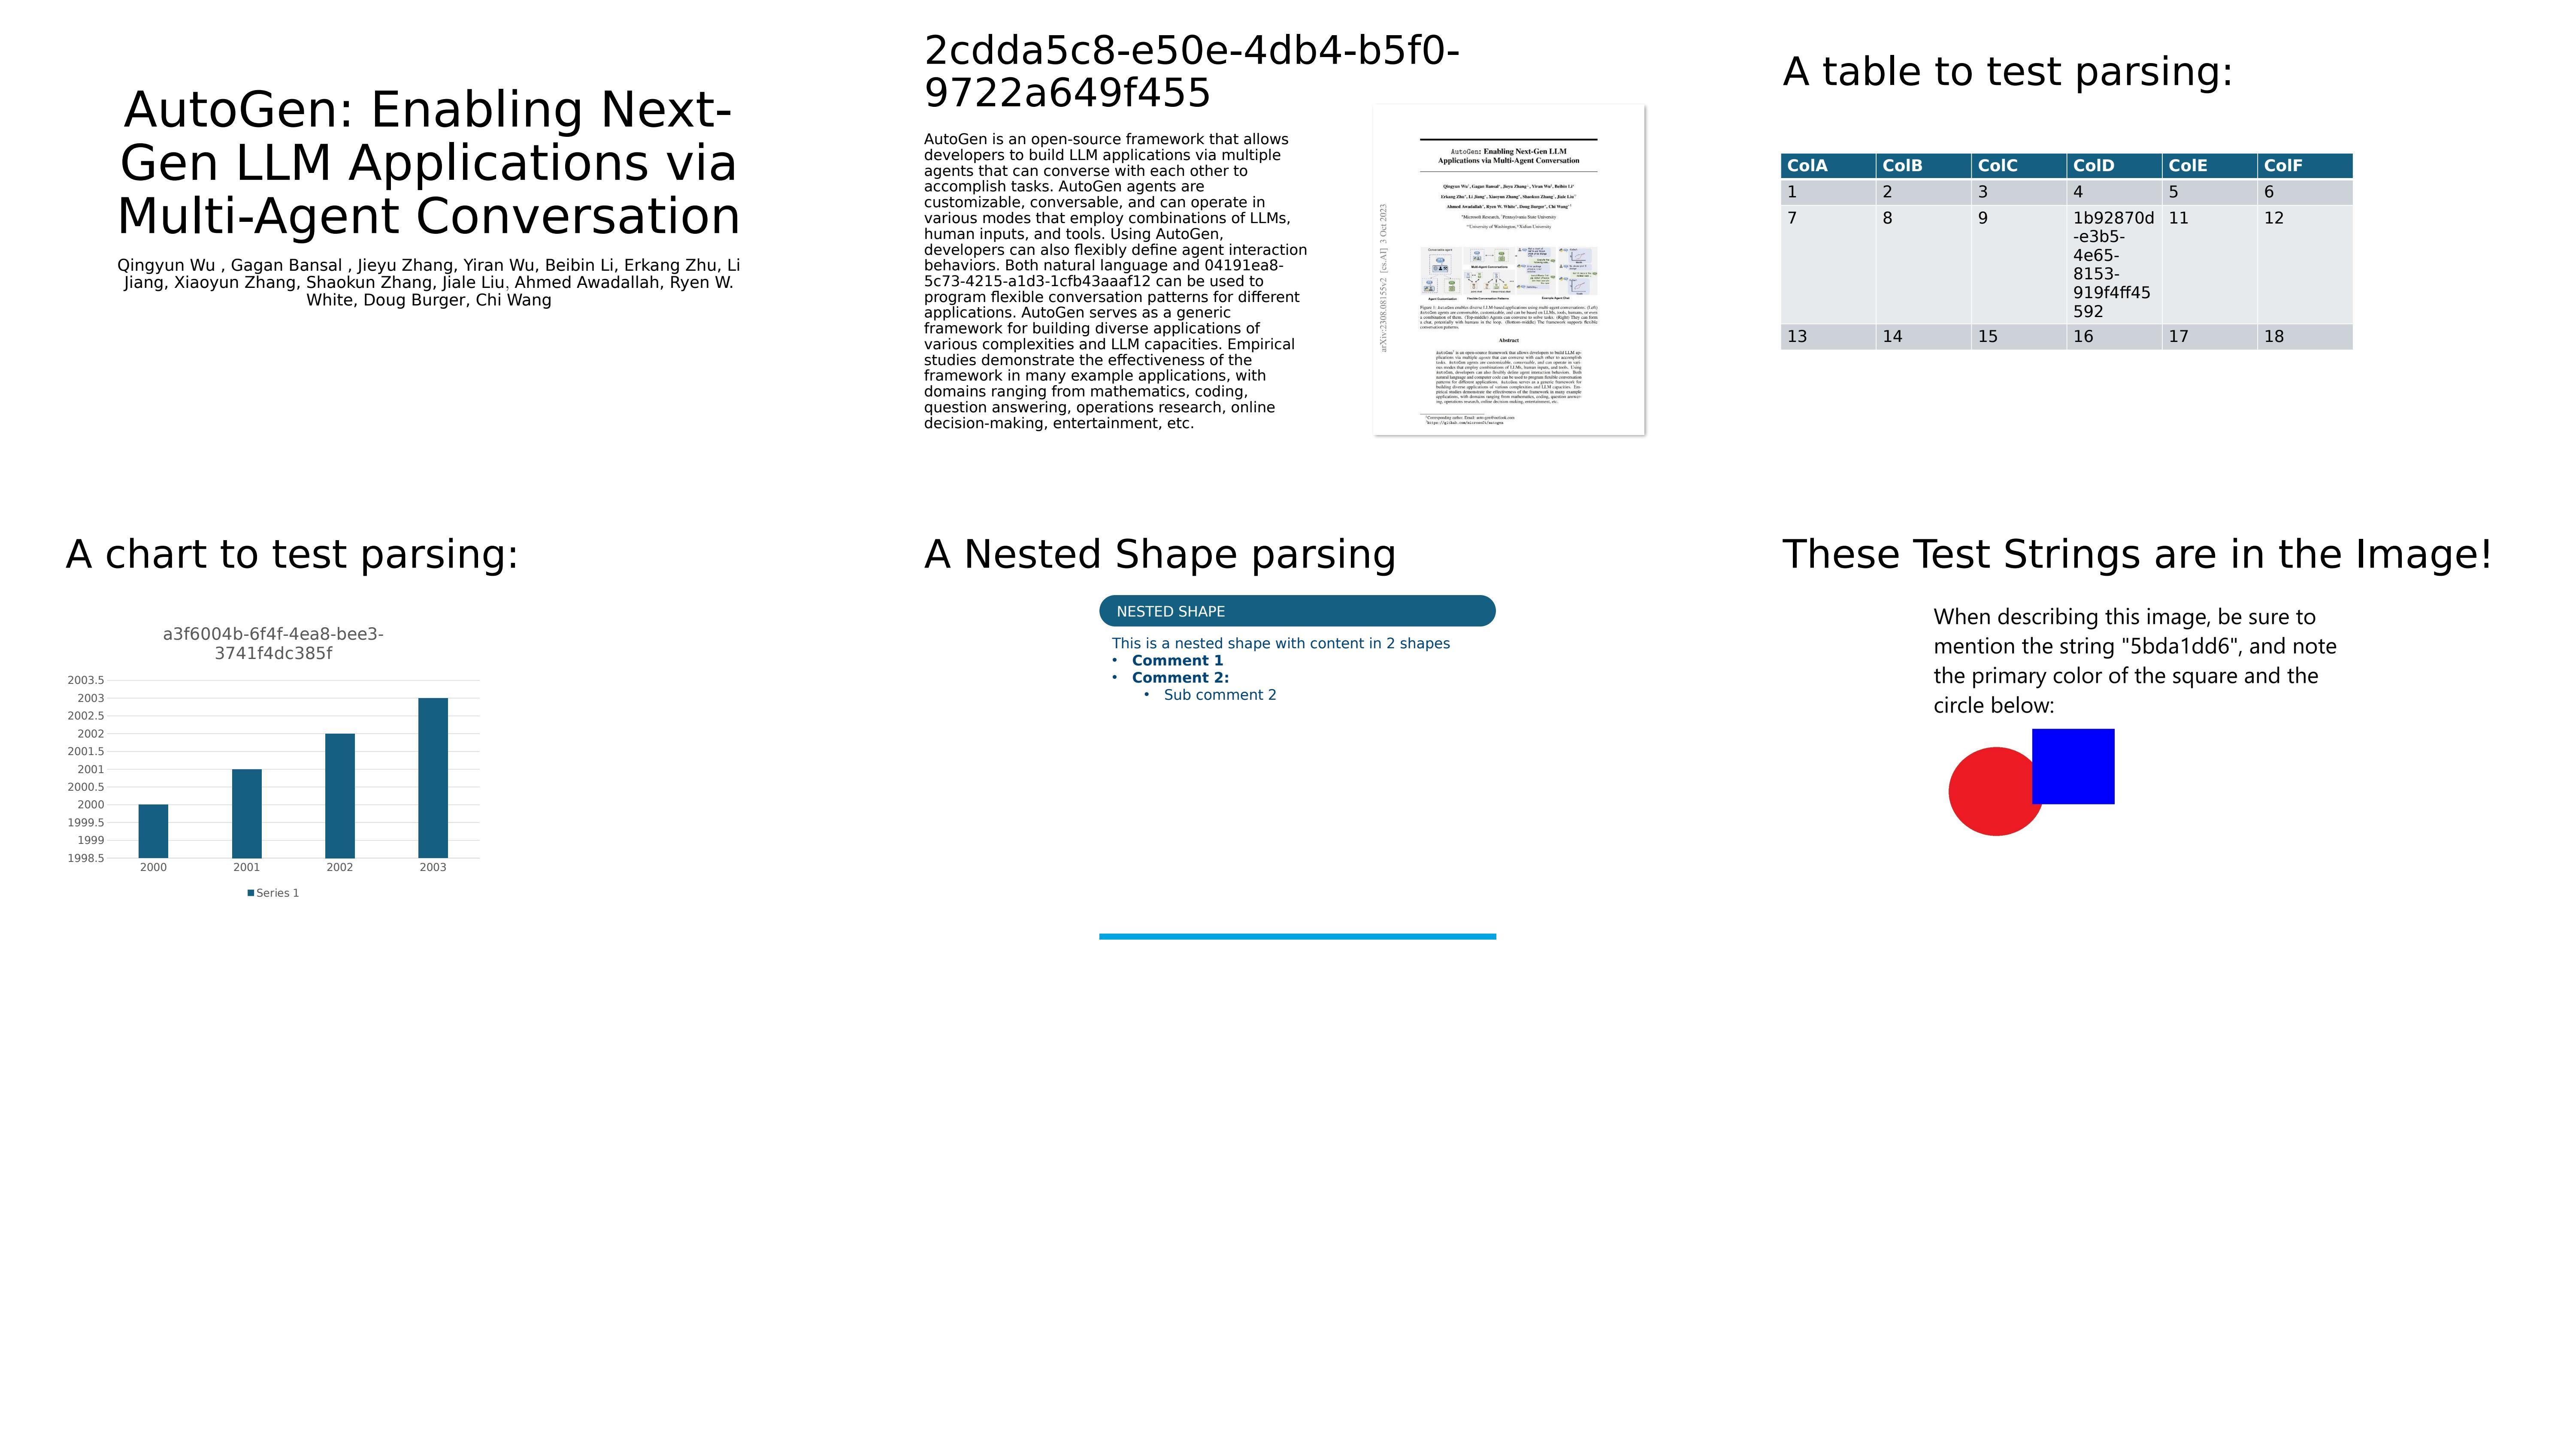

In [9]:
from IPython.display import display, HTML
display(HTML(f'<img src="{a[1].images[0]}" style="max-width:600px;">'))